## Step 1: Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from presentation import *
import numpy as np

## Step 2: Parameterize Image as a Closed-Loop Function

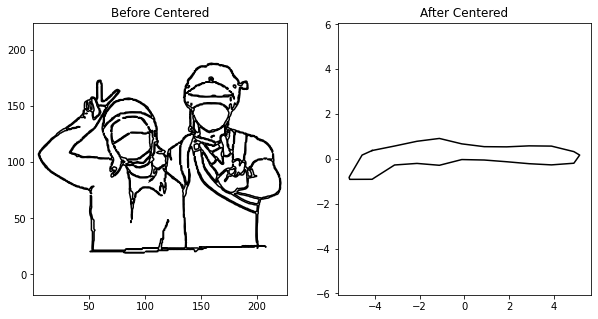

In [ ]:
time_table, x_table, y_table = create_close_loop('test.jpg')

In [ ]:
print(time_table)
print(x_table)
print(y_table)
print(create_close_loop)

[0.00000000e+00 5.07691120e-04 1.01538224e-03 ... 6.28216992e+00
 6.28267762e+00 6.28318531e+00]
[232.03201344 231.34327172 231.54849696 ... 233.03201344 232.72075516
 232.03201344]
[750.74726342 750.0585217  749.0585217  ... 749.74726342 750.0585217
 750.74726342]
<function create_close_loop at 0x7f9150ff9e60>


## Step 3: Calculate Discrete Fourier Transform Coefficient

In [ ]:
order = 30 # We need higher order approximation to get better approximation
coef = coef_list(time_table, x_table, y_table, order)
print(coef)

[[-6.91650839e-04  2.92974567e-04]
 [ 8.44748870e-04 -1.98353395e-04]
 [ 8.87462253e-04  8.60398322e-04]
 [-2.04169720e-03 -2.09876349e-03]
 [ 2.05162489e-07 -1.16545082e-05]
 [-3.39227133e-03  2.62030143e-03]
 [-1.25275349e-03 -8.76095442e-04]
 [ 6.77327217e-04  3.95767295e-03]
 [-2.78798833e-03  7.27147013e-04]
 [ 3.51406436e-03 -1.16052198e-03]
 [ 1.47680353e-04 -3.73172736e-04]
 [-7.82738907e-04 -3.51895550e-04]
 [ 9.86421716e-04  2.54248413e-03]
 [ 8.93207263e-04  5.74493002e-04]
 [ 3.28613800e-03  4.74300717e-03]
 [ 4.56664203e-03 -7.48976195e-03]
 [ 7.10796454e-04 -1.41448437e-02]
 [-1.55329691e-02 -6.25798407e-03]
 [-1.16232252e-02 -4.02706017e-03]
 [-1.86201131e-03  1.37063451e-02]
 [ 4.72087513e-03  2.76103847e-03]
 [-5.93259265e-03 -2.03961154e-02]
 [-3.91662399e-02  5.98482038e-03]
 [-2.62568027e-02  3.70795870e-02]
 [-2.00482801e-03  6.76992023e-04]
 [ 7.61853005e-03 -2.94967720e-03]
 [-3.89059008e-02  1.64748510e-02]
 [ 7.89618763e-02 -1.85036744e-02]
 [ 1.74001605e-01  1

## Step 4: Evaluate Fourier Transform

In [ ]:
space = np.linspace(0, tau, 300) # Did you know what tau is ? Check my previous video about it ! :D
x_DFT = [DFT(t, coef, order)[0] for t in space]
y_DFT = [DFT(t, coef, order)[1] for t in space]

## Step 5: Visualize it

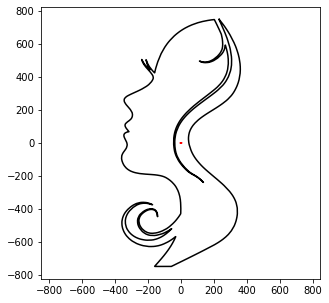

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_DFT, y_DFT, 'r--')
ax.plot(x_table, y_table, 'k-')
ax.set_aspect('equal', 'datalim')
xmin, xmax = xlim()
ymin, ymax = ylim()

## Step 6: Create Epicycle Animation

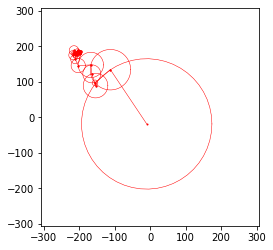

In [ ]:
anim = visualize(x_DFT, y_DFT, coef, order, space, [xmin, xmax, ymin, ymax])
Writer = animation.writers['html']
writer = Writer(fps=60)
anim.save('komodo.html',writer=writer, dpi=150)